In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [23]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.shape

(244, 7)

In [25]:
df.info()      #Basic information about data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [26]:
df.isna().sum()   #TO check the null values

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [94]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


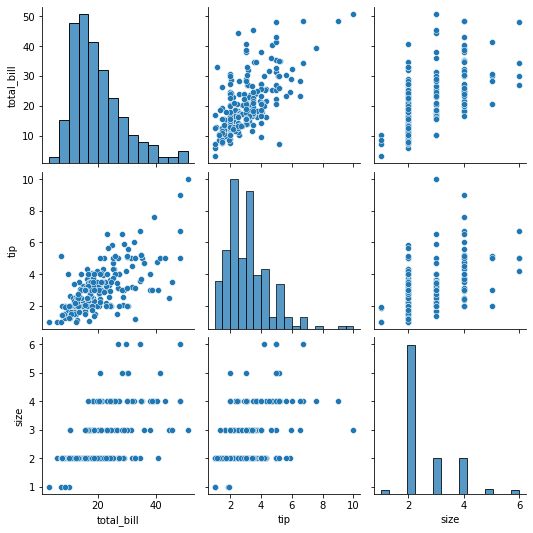

In [99]:
sns.pairplot(df)

<AxesSubplot:xlabel='tip', ylabel='Count'>

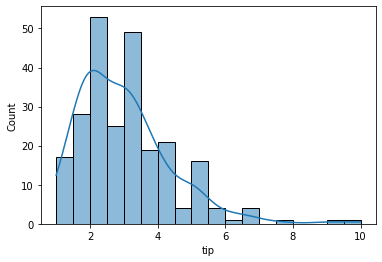

In [27]:
sns.histplot(df["tip"],kde=True)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

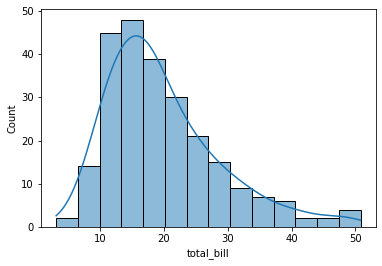

In [28]:
sns.histplot(df["total_bill"],kde=True)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

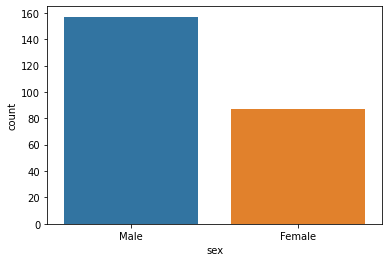

In [53]:
sns.countplot(df["sex"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

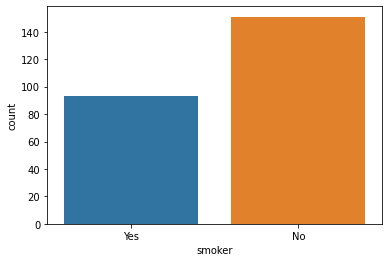

In [51]:
sns.countplot(df["smoker"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

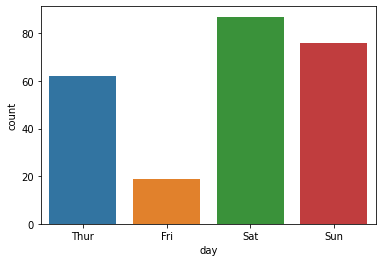

In [54]:
sns.countplot(df["day"])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

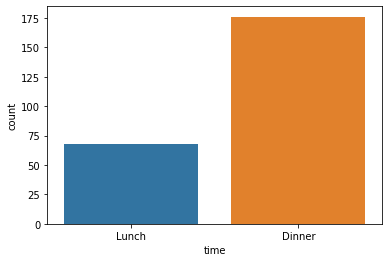

In [55]:
sns.countplot(df["time"])

In [56]:
df["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

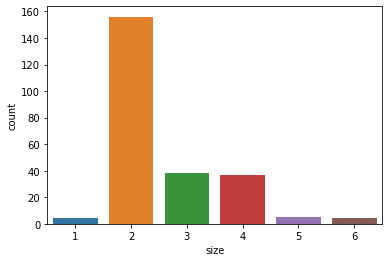

In [57]:
sns.countplot(df["size"])

Let us consider the X: Independent variable and Y= "tip" dependent variable

In independent features sex,smoker, day, and time are categorical variables

In [134]:
X=df.drop(["tip"],axis = 1)
Y=df.iloc[:,1]
print(X.head())

   total_bill     sex smoker  day    time  size
0       16.99  Female     No  Sun  Dinner     2
1       10.34    Male     No  Sun  Dinner     3
2       21.01    Male     No  Sun  Dinner     3
3       23.68    Male     No  Sun  Dinner     2
4       24.59  Female     No  Sun  Dinner     4


In [135]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [136]:
print(X.shape,Y.shape)


(244, 8) (244,)


In [137]:
import sklearn

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(183, 8)
(61, 8)
(183,)
(61,)


In [141]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [142]:
model=reg.fit(x_train,y_train)

In [143]:
model.intercept_

0.9144487738885587

In [144]:
model.coef_

array([ 0.09143601,  0.09715905, -0.02732059, -0.0546438 ,  0.22901937,
        0.18796687,  0.54492136, -0.28445423])

In [145]:
y_pred=model.predict(x_test)

In [146]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred);score

0.501720848394234

# Use full data set to get ANOVA table , Summary of regression model

In [151]:
import statsmodels.api as sm

In [152]:

X  #independent variable
Y  #dependent variable
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.20e-28
Time:                        14:09:21   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

**From above table we can say that "total_bill","Size" are significant at 6% level of significane**

In [167]:
X_sign=X[["total_bill","size"]]

In [168]:
X2 = sm.add_constant(X_sign)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           9.67e-34
Time:                        14:15:32   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0